In [ ]:
pip install numpy pandas matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Grid_Data.csv')
X = data['X'].values
Y = data['Y'].values

def loss_function(w, b, X, Y):
    predicted_Y = w * X + b
    return np.mean((Y - predicted_Y) ** 2)

In [ ]:
def gradient_descent(X, Y, learning_rate=0.01, iterations=1000, tolerance=1e-6):
    w = 0
    b = 0
    n = float(len(X))
    prev_loss = np.inf

    for i in range(iterations):
        Y_pred = w * X + b
        dw = (-2/n) * sum(X * (Y - Y_pred))
        db = (-2/n) * sum(Y - Y_pred)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        # 현재 손실 계산
        current_loss = loss_function(w, b, X, Y)

        # 손실 변화율 계산 및 종료 조건 검사
        if np.abs(prev_loss - current_loss) < tolerance:
            return i, w, b, current_loss

        prev_loss = current_loss

    return i, w, b, current_loss

학습률: 0.0001, tolerance: 0.001, 평균 반복 횟수: 520,
평균 w: 1.2639, 평균 b: 0.2109, 평균 손실: 0.4237


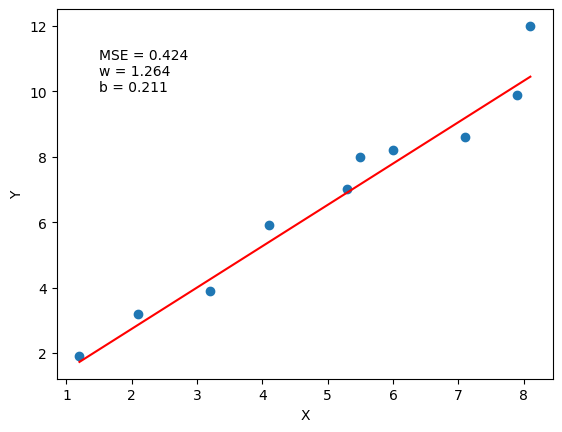

학습률: 0.0001, tolerance: 0.0001, 평균 반복 횟수: 703,
평균 w: 1.2975, 평균 b: 0.2169, 평균 손실: 0.3531


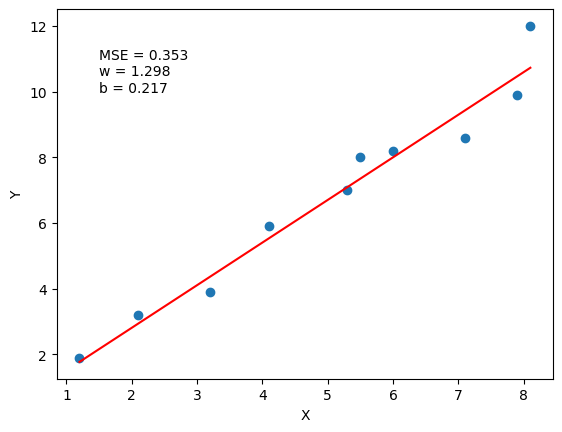

학습률: 0.0001, tolerance: 1e-05, 평균 반복 횟수: 886,
평균 w: 1.3081, 평균 b: 0.2190, 평균 손실: 0.3461


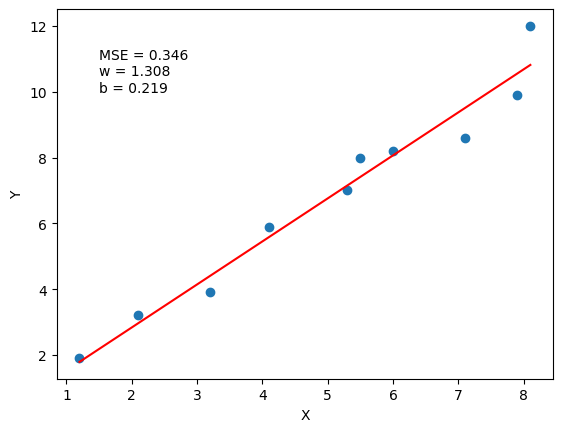

학습률: 0.0001, tolerance: 1e-06, 평균 반복 횟수: 999,
평균 w: 1.3106, 평균 b: 0.2196, 평균 손실: 0.3455


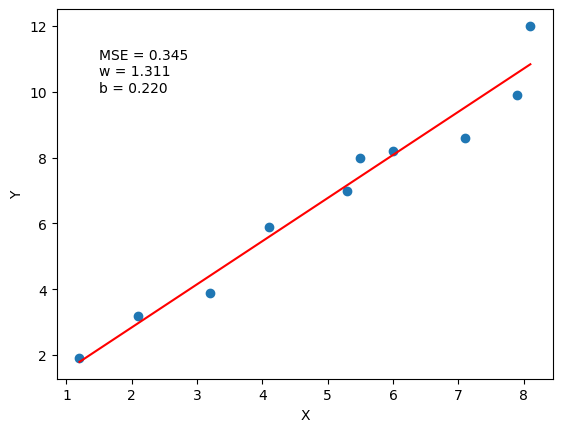

학습률: 0.001, tolerance: 0.001, 평균 반복 횟수: 68,
평균 w: 1.2982, 평균 b: 0.2170, 평균 손실: 0.3525


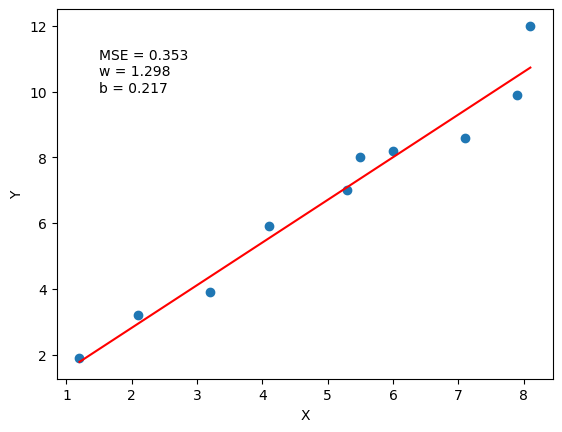

학습률: 0.001, tolerance: 0.0001, 평균 반복 횟수: 86,
평균 w: 1.3084, 평균 b: 0.2190, 평균 손실: 0.3460


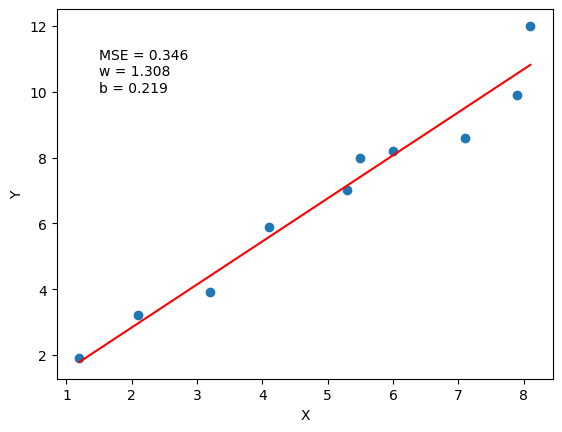

학습률: 0.001, tolerance: 1e-05, 평균 반복 횟수: 104,
평균 w: 1.3115, 평균 b: 0.2199, 평균 손실: 0.3454


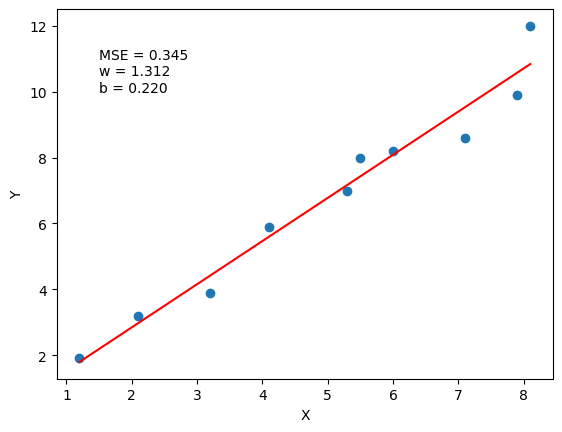

학습률: 0.001, tolerance: 1e-06, 평균 반복 횟수: 125,
평균 w: 1.3125, 평균 b: 0.2204, 평균 손실: 0.3453


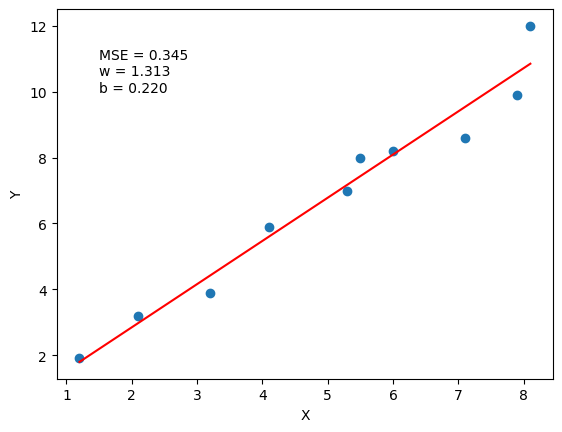

학습률: 0.005, tolerance: 0.001, 평균 반복 횟수: 14,
평균 w: 1.3085, 평균 b: 0.2188, 평균 손실: 0.3460


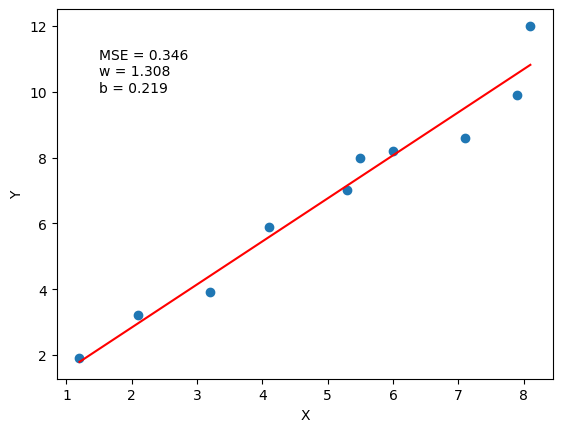

학습률: 0.005, tolerance: 0.0001, 평균 반복 횟수: 17,
평균 w: 1.3115, 평균 b: 0.2196, 평균 손실: 0.3454


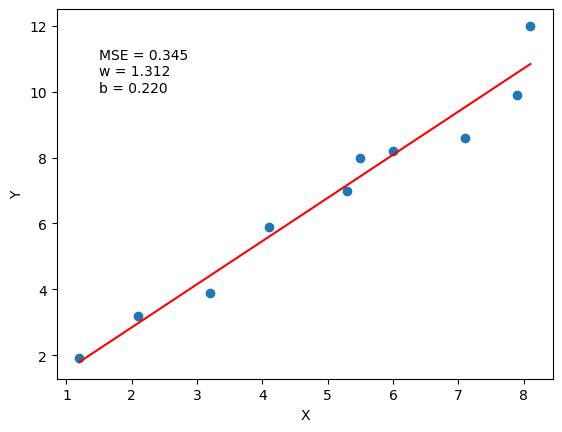

학습률: 0.005, tolerance: 1e-05, 평균 반복 횟수: 21,
평균 w: 1.3126, 평균 b: 0.2202, 평균 손실: 0.3453


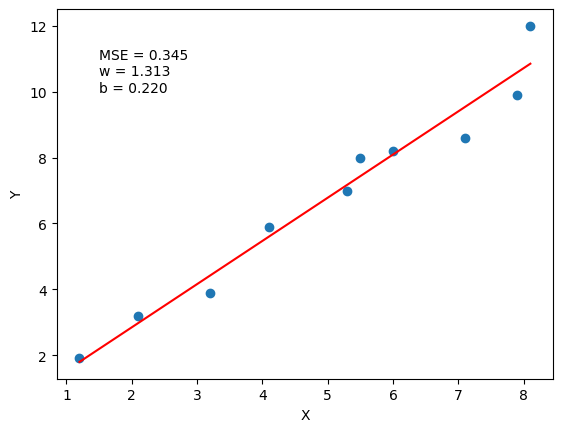

학습률: 0.005, tolerance: 1e-06, 평균 반복 횟수: 201,
평균 w: 1.3106, 평균 b: 0.2348, 평균 손실: 0.3451


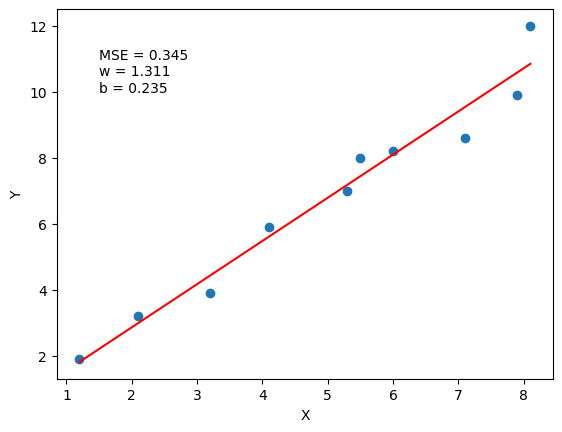

학습률: 0.01, tolerance: 0.001, 평균 반복 횟수: 6,
평균 w: 1.3118, 평균 b: 0.2192, 평균 손실: 0.3454


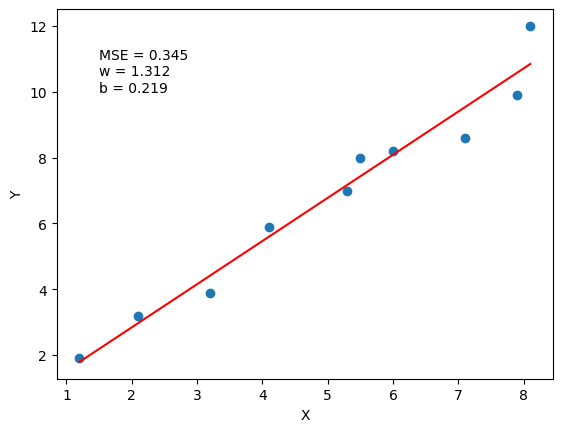

학습률: 0.01, tolerance: 0.0001, 평균 반복 횟수: 7,
평균 w: 1.3126, 평균 b: 0.2196, 평균 손실: 0.3453


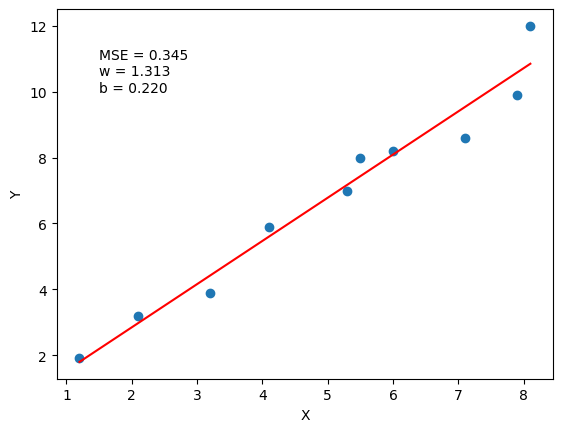

학습률: 0.01, tolerance: 1e-05, 평균 반복 횟수: 9,
평균 w: 1.3129, 평균 b: 0.2200, 평균 손실: 0.3453


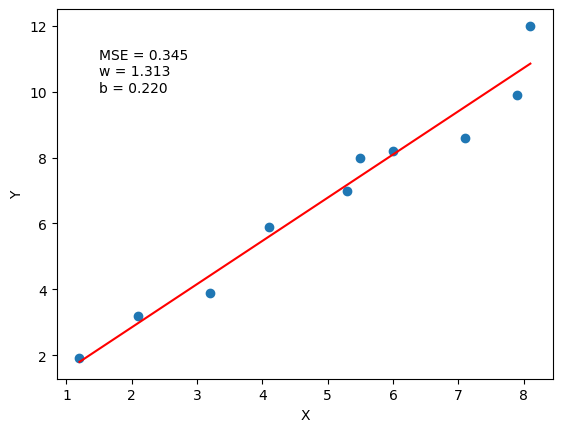

학습률: 0.01, tolerance: 1e-06, 평균 반복 횟수: 208,
평균 w: 1.3084, 평균 b: 0.2475, 평균 손실: 0.3449


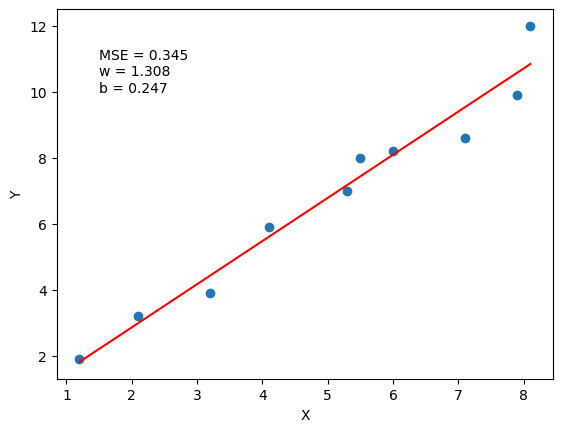

In [ ]:
tolerances = [1e-3, 1e-4, 1e-5, 1e-6]
learning_rates = [0.0001, 0.001, 0.005, 0.01]
num_trials = 100
for lr in learning_rates:
    for tol in tolerances:
        total_iterations = 0
        total_w = 0
        total_b = 0
        total_loss = 0

        for _ in range(num_trials):
            iterations, w, b, loss = gradient_descent(X, Y, learning_rate=lr,
                                                      iterations=1000, tolerance=tol)
            total_iterations += iterations
            total_w += w
            total_b += b
            total_loss += loss

        avg_iterations = total_iterations / num_trials
        avg_w = total_w / num_trials
        avg_b = total_b / num_trials
        avg_loss = total_loss / num_trials

        print(f"학습률: {lr}, tolerance: {tol}, 평균 반복 횟수: {avg_iterations:.0f},")
        print(f"평균 w: {avg_w:.4f}, 평균 b: {avg_b:.4f}, 평균 손실: {avg_loss:.4f}")
        plt.scatter(X, Y)
        plt.plot(X, avg_w*X + avg_b, color='red')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.text(1.5, 11, "MSE = {:.3f}".format(avg_loss))
        plt.text(1.5, 10.5, "w = {:.3f}".format(avg_w))
        plt.text(1.5, 10, "b = {:.3f}".format(avg_b))
        plt.show()


tolerances: 0.001
학습률: 0.0001
반복 0: w = 0.0082488, b = 0.001372, 손실 = 55.31094519451027
반복 100: w = 0.6182814463185587, b = 0.10288831171873372, 손실 = 15.933565758910927
반복 200: w = 0.9431338894751798, b = 0.15703924419917245, 손실 = 4.766149227692273
반복 300: w = 1.116116282193856, b = 0.18596589122682386, 손실 = 1.5990703279300775
반복 400: w = 1.2082217218923132, b = 0.20145928988961836, 손실 = 0.7008849670315845
반복 500: w = 1.2572569304777355, b = 0.20979864962855746, 손실 = 0.44615719828825995
반복 520: w = 1.263869073670991, b = 0.21093581475452713, 손실 = 0.4236914803201646


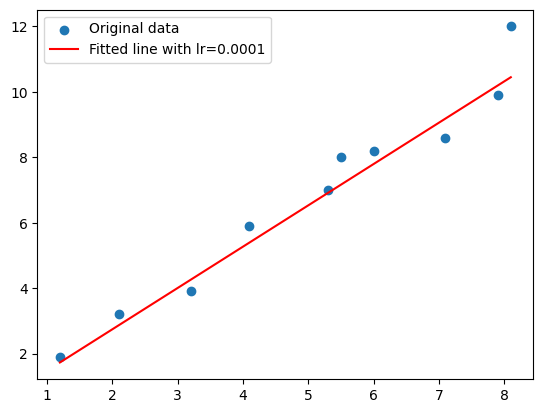

학습률: 0.001
반복 0: w = 0.082488, b = 0.01372, 손실 = 49.23509634702765
반복 68: w = 1.2981528872298695, b = 0.216958432523822, 손실 = 0.3525190624112803


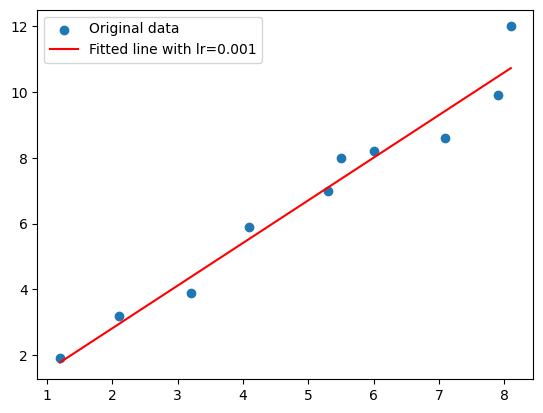

학습률: 0.005
반복 0: w = 0.41244000000000003, b = 0.0686, 손실 = 26.535579555691196
반복 14: w = 1.3084774239991057, b = 0.21879029323480376, 손실 = 0.34599366755012956


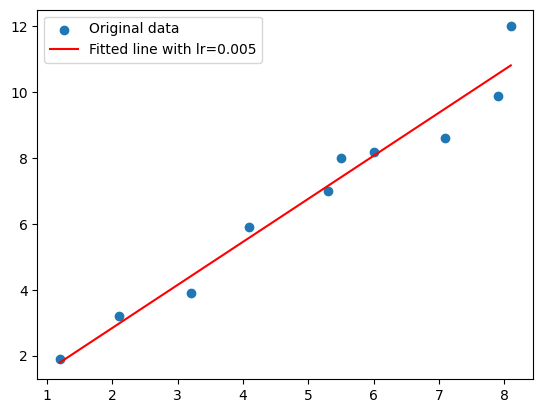

학습률: 0.01
반복 0: w = 0.8248800000000001, b = 0.1372, 손실 = 8.0434036627648
반복 6: w = 1.3118002241172917, b = 0.21924642522346283, 손실 = 0.3453666846432414


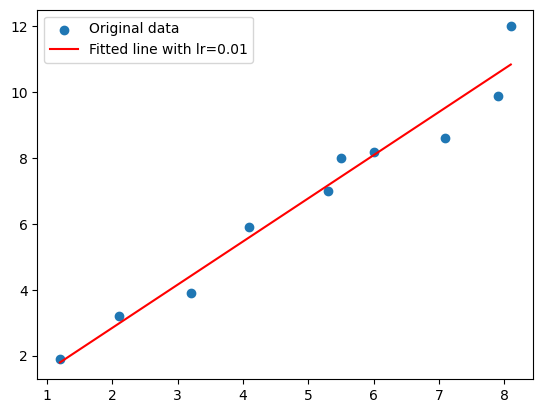


tolerances: 0.0001
학습률: 0.0001
반복 0: w = 0.0082488, b = 0.001372, 손실 = 55.31094519451027
반복 100: w = 0.6182814463185587, b = 0.10288831171873372, 손실 = 15.933565758910927
반복 200: w = 0.9431338894751798, b = 0.15703924419917245, 손실 = 4.766149227692273
반복 300: w = 1.116116282193856, b = 0.18596589122682386, 손실 = 1.5990703279300775
반복 400: w = 1.2082217218923132, b = 0.20145928988961836, 손실 = 0.7008849670315845
반복 500: w = 1.2572569304777355, b = 0.20979864962855746, 손실 = 0.44615719828825995
반복 600: w = 1.2833555303486706, b = 0.21432790668648632, 손실 = 0.37391384031316777
반복 700: w = 1.2972394970627745, b = 0.2168278445178617, 손실 = 0.3534230272855788
반복 703: w = 1.2975354045309229, b = 0.2168828009763863, 손실 = 0.3531220290987318


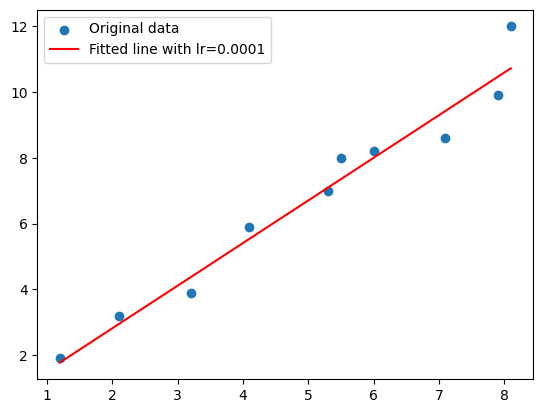

학습률: 0.001
반복 0: w = 0.082488, b = 0.01372, 손실 = 49.23509634702765
반복 86: w = 1.3083908545063656, b = 0.2190066092381414, 손실 = 0.3460040429596217


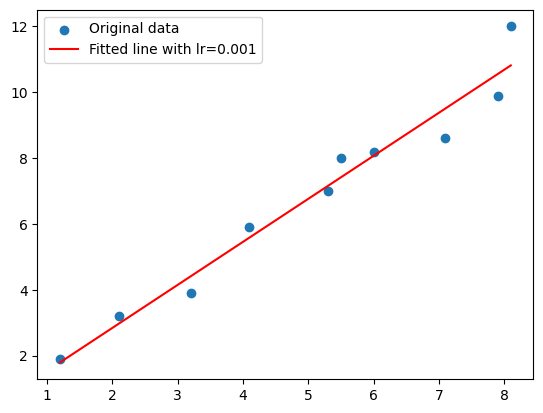

학습률: 0.005
반복 0: w = 0.41244000000000003, b = 0.0686, 손실 = 26.535579555691196
반복 17: w = 1.3115454590466873, b = 0.21958943455865965, 손실 = 0.3453766917165867


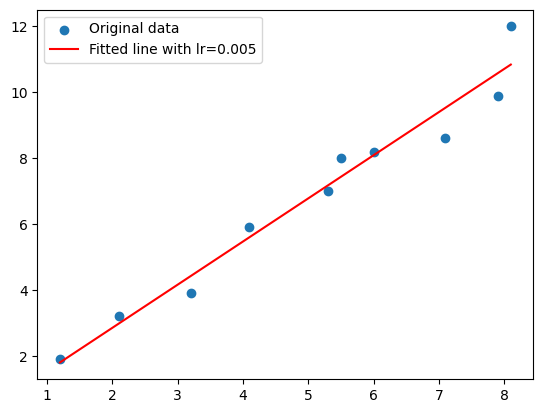

학습률: 0.01
반복 0: w = 0.8248800000000001, b = 0.1372, 손실 = 8.0434036627648
반복 7: w = 1.3125803861578569, b = 0.2195696740831471, 손실 = 0.3453166266435619


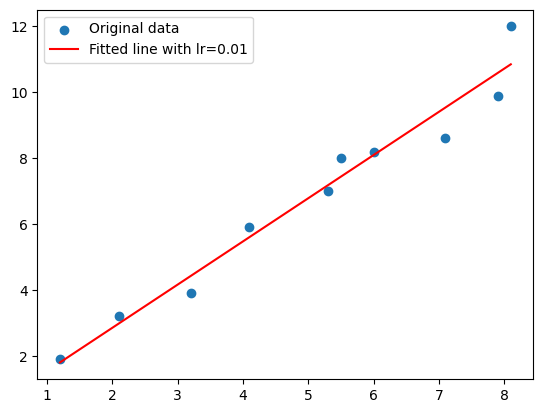


tolerances: 1e-05
학습률: 0.0001
반복 0: w = 0.0082488, b = 0.001372, 손실 = 55.31094519451027
반복 100: w = 0.6182814463185587, b = 0.10288831171873372, 손실 = 15.933565758910927
반복 200: w = 0.9431338894751798, b = 0.15703924419917245, 손실 = 4.766149227692273
반복 300: w = 1.116116282193856, b = 0.18596589122682386, 손실 = 1.5990703279300775
반복 400: w = 1.2082217218923132, b = 0.20145928988961836, 손실 = 0.7008849670315845
반복 500: w = 1.2572569304777355, b = 0.20979864962855746, 손실 = 0.44615719828825995
반복 600: w = 1.2833555303486706, b = 0.21432790668648632, 손실 = 0.37391384031316777
반복 700: w = 1.2972394970627745, b = 0.2168278445178617, 손실 = 0.3534230272855788
반복 800: w = 1.304618720085485, b = 0.2182468039120331, 손실 = 0.34760923840097613
반복 886: w = 1.3081236946327621, b = 0.21899473145672793, 손실 = 0.3460842291075571


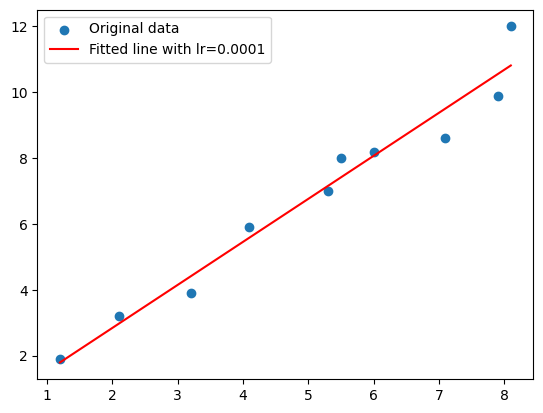

학습률: 0.001
반복 0: w = 0.082488, b = 0.01372, 손실 = 49.23509634702765
반복 100: w = 1.3111213470615892, b = 0.21972921382344754, 손실 = 0.3454150522733886
반복 104: w = 1.311537378799015, b = 0.21987497553175459, 손실 = 0.3453677112620116


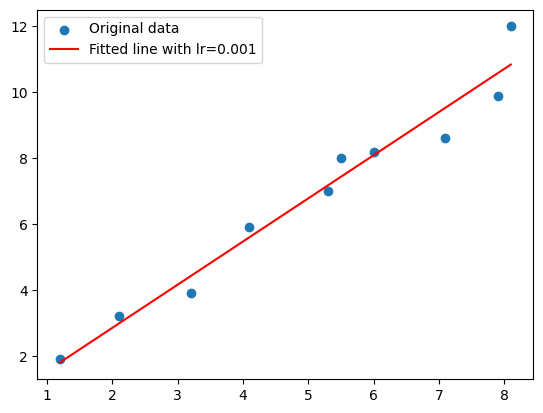

학습률: 0.005
반복 0: w = 0.41244000000000003, b = 0.0686, 손실 = 26.535579555691196
반복 21: w = 1.3126391722302506, b = 0.22015501880940647, 손실 = 0.3453019014012749


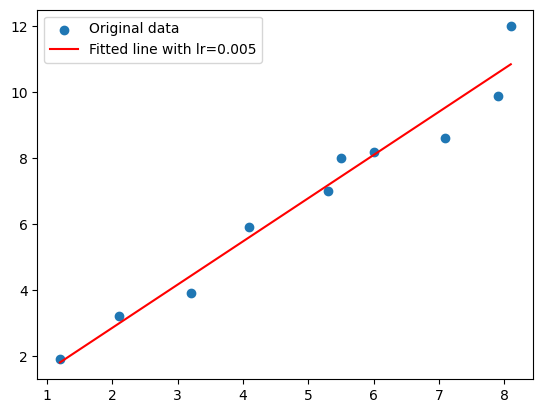

학습률: 0.01
반복 0: w = 0.8248800000000001, b = 0.1372, 손실 = 8.0434036627648
반복 9: w = 1.312932078660341, b = 0.2200135618315766, 손실 = 0.34530210146459767


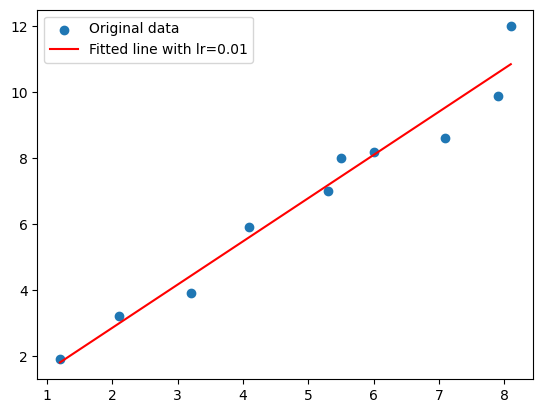


tolerances: 1e-06
학습률: 0.0001
반복 0: w = 0.0082488, b = 0.001372, 손실 = 55.31094519451027
반복 100: w = 0.6182814463185587, b = 0.10288831171873372, 손실 = 15.933565758910927
반복 200: w = 0.9431338894751798, b = 0.15703924419917245, 손실 = 4.766149227692273
반복 300: w = 1.116116282193856, b = 0.18596589122682386, 손실 = 1.5990703279300775
반복 400: w = 1.2082217218923132, b = 0.20145928988961836, 손실 = 0.7008849670315845
반복 500: w = 1.2572569304777355, b = 0.20979864962855746, 손실 = 0.44615719828825995
반복 600: w = 1.2833555303486706, b = 0.21432790668648632, 손실 = 0.37391384031316777
반복 700: w = 1.2972394970627745, b = 0.2168278445178617, 손실 = 0.3534230272855788
반복 800: w = 1.304618720085485, b = 0.2182468039120331, 손실 = 0.34760923840097613
반복 900: w = 1.308533948463103, b = 0.21908981595888852, 손실 = 0.34595786618854174
반복 1000: w = 1.310604505024414, b = 0.21962583123609233, 손실 = 0.34548697079378493
반복 1071: w = 1.31144608718493, b = 0.21990163853835248, 손실 = 0.3453750526135201


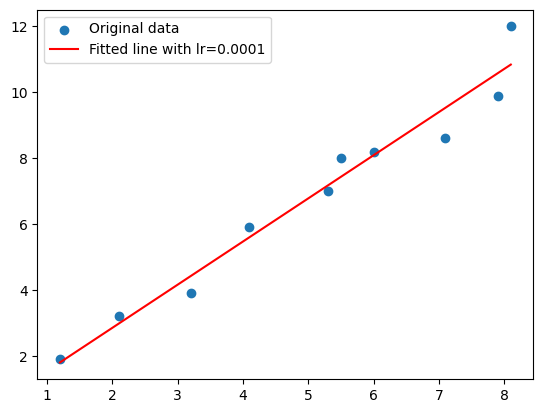

학습률: 0.001
반복 0: w = 0.082488, b = 0.01372, 손실 = 49.23509634702765
반복 100: w = 1.3111213470615892, b = 0.21972921382344754, 손실 = 0.3454150522733886
반복 125: w = 1.3125483806392155, b = 0.22044375812154576, 손실 = 0.3452972032884281


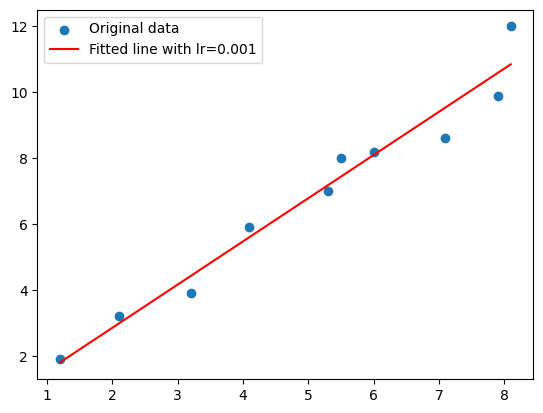

학습률: 0.005
반복 0: w = 0.41244000000000003, b = 0.0686, 손실 = 26.535579555691196
반복 100: w = 1.3118208430304048, b = 0.22711533576909623, 손실 = 0.34517428585490806
반복 200: w = 1.3105637587498162, b = 0.23468416297237207, 손실 = 0.3450563907626979
반복 201: w = 1.310552184382655, b = 0.23475385152578263, 손실 = 0.3450553934753714


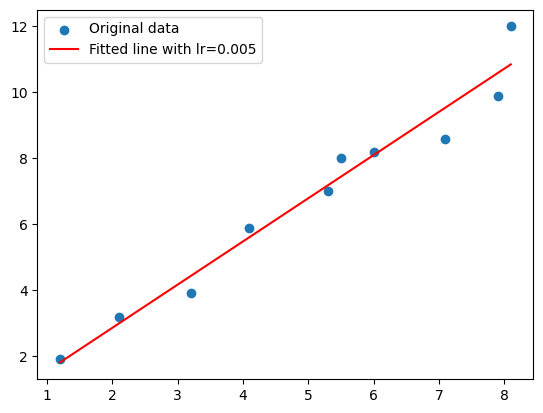

학습률: 0.01
반복 0: w = 0.8248800000000001, b = 0.1372, 손실 = 8.0434036627648
반복 100: w = 1.3105502964328763, b = 0.23476521875538314, 손실 = 0.34505523095579854
반복 200: w = 1.308572633448668, b = 0.2466726060522583, 손실 = 0.34490850621911673
반복 208: w = 1.3084403187337503, b = 0.24746926481979556, 손실 = 0.3449003667647067


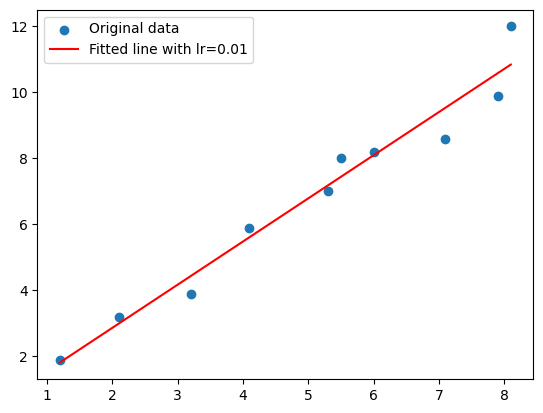

In [ ]:
tolerances = [1e-3, 1e-4, 1e-5, 1e-6]
learning_rates = [0.0001,0.001, 0.005, 0.01]
for tol in tolerances:
    print(f"\ntolerances: {tol}")
    for lr in learning_rates:
        print(f"학습률: {lr}")
        w, b = gradient_descent(X, Y, learning_rate=lr, iterations=10000, tolerance=tol)
        plt.scatter(X, Y, label='Original data')
        plt.plot(X, w*X + b, color='red', label=f'Fitted line with lr={lr}')
        plt.legend()
        plt.show()

In [ ]:
# 경사 하강법 실행
learning_rate = 0.01 # 학습률
iterations = 1000 # 반복 횟수
w, b = gradient_descent(X, Y, learning_rate, iterations)

print(f"최종 결과: w = {w}, b = {b}, 손실 = {loss_function(w, b, X, Y)}")

반복 0: w = 0.8248800000000001, b = 0.1372, 손실 = 8.0434036627648
반복 100: w = 1.3105502964328763, b = 0.23476521875538314, 손실 = 0.34505523095579854
반복 200: w = 1.308572633448668, b = 0.2466726060522583, 손실 = 0.34490850621911673
반복 300: w = 1.3071409171205084, b = 0.25529288208249695, 손실 = 0.34483160862987605
반복 400: w = 1.3061044353434375, b = 0.2615334751685226, 손실 = 0.34479130704634825
반복 500: w = 1.3053540810637032, b = 0.26605131217614736, 손실 = 0.3447701852185908
반복 600: w = 1.3048108669353211, b = 0.26932197106162536, 손실 = 0.3447591153903422
반복 700: w = 1.3044176105799652, b = 0.2716897434108939, 손실 = 0.34475331375712814
반복 800: w = 1.3041329151846368, b = 0.2734038768911086, 손실 = 0.3447502731545833
반복 900: w = 1.3039268117942722, b = 0.27464481273905983, 손실 = 0.344748679592306
최종 결과: w = 1.3037788706458402, b = 0.27553555730251295, 손실 = 0.3447478503770492
